# **ANÁLISE DE DADOS CARDIÁCOS - PREVISÃO DE DOENÇA CARDIÁCA**

O objetivo deste projeto é denselvolver um algoritmo de Machine Learning que fará a previsão da tendência de uma pessoa desenvolver algum tipo de doença cardiáca. 

A base de dados foi extraida do site Kaggle e pode ser acessada neste [link](https://www.kaggle.com/fedesoriano/heart-failure-prediction/version/1)



https://www.kaggle.com/code/durgancegaur/a-guide-to-any-classification-problem

==========================================================================================================================

## **SOBRE AS DOENÇAS CARDIOVASCULARES**

As doenças cardiovasculares (DCVs) são a causa número 1 de morte em todo o mundo, levando cerca de 17,9 milhões de vidas a cada ano, o que representa 31% de todas as mortes em todo o mundo. Quatro das mortes por 5CVD são devido a ataques cardíacos e derrames, e um terço dessas mortes ocorre prematuramente em pessoas com menos de 70 anos de idade. A insuficiência cardíaca é um evento comum causado por DCV e este conjunto de dados contém 11 características que podem ser usadas para prever uma possível doença cardíaca.

==========================================================================================================================
## **DESCREVENDO OS DADOS**

- **Age:** idade do paciente [anos]

- **Sex:** sexo do paciente [M: Masculino, F: Feminino]

- **ChestPainType:** tipo de dor no peito [TA: Angina Típica, ATA: Angina Atípica, NAP: Dor Não Anginosa, ASY: Assintomática]

- **RestingBP:** pressão arterial de repouso [mm Hg]

- **Cholesterol:** colesterol sérico [mm/dl]

- **FastingBS:** glicemia em jejum [1: se FastingBS > 120 mg/dl, 0: caso contrário]

- **RestingECG:** resultados do eletrocardiograma de repouso [Normal: normal, ST: com anormalidade da onda ST-T (inversões da onda T e/ou elevação ou depressão do ST > 0,05 mV), HVE: mostrando provável ou definitiva hipertrofia ventricular esquerda pelos critérios de Estes]

- **MaxHR:** frequência cardíaca máxima alcançada [Valor numérico entre 60 e 202]

- **ExerciseAngina:** angina induzida por exercício [S: Sim, N: Não]

- **Oldpeak:** pico antigo = ST [Valor numérico medido em depressão]

- **ST_Slope:** a inclinação do segmento ST do exercício de pico [Up: upsloping, Flat: flat, Down: downsloping]

- **HeartDisease:** classe de saída [1: doença cardíaca, 0: normal]

==========================================================================================================================



## **IMPORTANDO AS BIBLIOTECAS**

In [174]:
import warnings
warnings.simplefilter('ignore')

In [175]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import plotly.express as px
import seaborn as sns

sns.set()

## **EXPLORANDO OS DADOS**

In [176]:
df = pd.read_csv('heart.csv')
df.head(3)

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0


In [177]:
df.tail(3)

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1
917,38,M,NAP,138,175,0,Normal,173,N,0.0,Up,0


In [178]:
#Verificando o formato dos dados e tambem a existencia de dados nulos
#Verifico que não existem dados nulos neste conjunto de dados
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


## **ANÁLISE DOS ATRIBUTOS**

### **AGE - IDADE**

In [179]:
#Verificando a disstribuição das Idades
#Boa parte das idades fica entre 45 e 65 anos
#Idade minima é de 28 anos e a Máxima 77

df['Age'].describe()

count    918.000000
mean      53.510893
std        9.432617
min       28.000000
25%       47.000000
50%       54.000000
75%       60.000000
max       77.000000
Name: Age, dtype: float64

In [180]:
#Aqui plooto o Gŕafico com a distribuição das idades
fig = px.histogram(df, x= 'Age')

fig.update_layout(width = 800, 
height = 400, 
title_text = 'Idade' )

fig.show()


### **SEX - SEXO**

In [181]:
#Verificando os dados coluna Sexo, consigo ver que boa parte da base de dados é composta por pessoas do sexo Masculino
print(f'Quantidade de Pessoas por Sexo'.upper())
print('=' * 30)
df['Sex'].value_counts() 

QUANTIDADE DE PESSOAS POR SEXO


M    725
F    193
Name: Sex, dtype: int64

In [182]:
#Verificando a informação em forma percentual
print(f'Percentual de Pessoas por Sexo'.upper())
print('=' * 30)
round(df["Sex"].value_counts() / df["Sex"].shape[0] * 100, 2)

PERCENTUAL DE PESSOAS POR SEXO


M    78.98
F    21.02
Name: Sex, dtype: float64

In [183]:
#Analisando a iformação de forma gráfica

fig = px.histogram(df, x= 'Sex',
      color = 'Sex',
      hover_data=df.columns,
      title = 'masculino x feminino'.upper())

fig.update_layout(width = 800,
    height = 400)


fig.show()


### **Chest Pain Type - Tipo de dor no Peito**

- **ASY**: assintomático.

- **NAP**: dor não anginosa.

- **ATA**: angina atípica.

- **TA**: angina típica.

O Gráfico está colorido de acordo com o número de pessoas que tem problema cardiáco.

Nota-se que a maioria das pessoas com problema teve dor no peito assintomática. 

In [184]:
df['ChestPainType'].value_counts()

ASY    496
NAP    203
ATA    173
TA      46
Name: ChestPainType, dtype: int64

In [185]:
#Analisando a informação de forma gráfica

fig=px.histogram(df, x="ChestPainType", 
    color = 'HeartDisease',
    hover_data=df.columns,
    title="Types of Chest Pain")

fig.update_layout(width = 800, 
    height = 400, 
    title_text = 'Tipo de Dor no Peito')
    
fig.show()

### **Resting BP (blood pressure) = pressão sanguínea em repouso em mmHg(sistólica)**

- **Definição de pressão Sistólica**:

A pressão sistólica, ou máxima, é aquela que marca a contração do músculo cardíaco, quando ele bombeia sangue para o corpo. A diastólica, por sua vez, é a do momento de repouso, em que os vasos permanecem abertos para o sangue passar. Com a idade, é até mais comum que a pressão sistólica dê uma subidinha.

[Fonte da Definição Saude Abril](https://saude.abril.com.br/medicina/pressao-arterial-qual-numero-e-mais-perigoso/)

In [186]:
#Aqui já identifico dados com problema
#Vejo que existem pressão com valor muito baixo


fig = px.histogram(df, x = 'RestingBP',
      hover_data=df.columns,
      title='Pressão sanguinea em repouso'.upper(), nbins = 30)

fig.update_layout(width = 800, 
      height = 400)               
      

fig.show()

In [187]:
df.columns

Index(['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS',
       'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope',
       'HeartDisease'],
      dtype='object')

### **Cholesterol = colesterol sérico (mg/dl)**

É a quantidade total de Colesterol no sangue de uma pessoa



In [188]:
#Tudo indica que tenho problemas por aqui tambem

fig = px.histogram(df, x= 'Cholesterol',
      hover_data=df.columns,
      title= 'Colesterol sérico'.upper(), nbins= 30)

fig.update_layout(width = 800, height = 500)

fig.show()

### **Fasting BS (blood sugar) = açúcar no sangue em jejum (mg/dl)**

0: Fasting BS < 120 mg/dl (não diabético)

1: Fasting BS >= 120 mg/dl, (diabético)

In [189]:
df['FastingBS'].value_counts()

0    704
1    214
Name: FastingBS, dtype: int64

In [190]:
#Verificando a quantidade de pessoas que tem colesterol no sangue quando em jejum
mensagem = 'Percentual de pessoas com açucar no sangue em jejum'
print(mensagem)
print('=' * len(mensagem))

print(round(df['FastingBS'].value_counts() / df.shape[0] * 100, 2))

print('=' * len(mensagem))

Percentual de pessoas com açucar no sangue em jejum
0    76.69
1    23.31
Name: FastingBS, dtype: float64


In [191]:
# Analisando os dados de forma gráfica

fig = px.histogram(df, x= 'FastingBS',
      color = 'FastingBS',
      hover_data=df.columns,
      title = 'masculino x feminino'.upper())

fig.update_layout(width = 800,
    height = 400)

fig.show()


### **Resting ECG = eletrocardiograma em repouso**

- **Normal**: Normal

- **LVH**: Hipertrofia ventricular esquerda

- **ST**: Anormalidade da onda ST-T

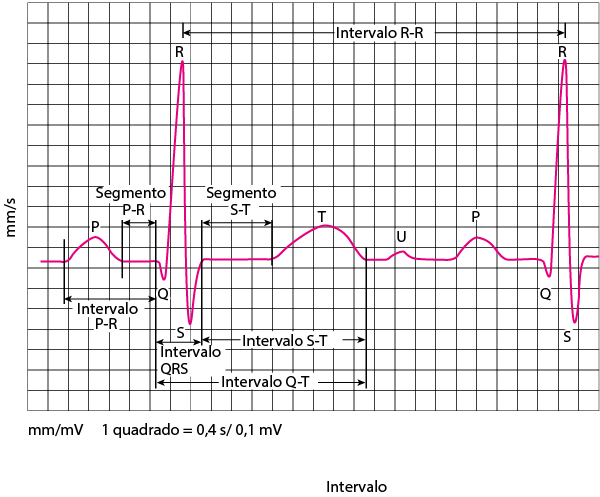

**SEGMENTO ST:** Qualquer desnível do
segmento ST, para cima (supradesnível) ou para baixo
(infradesnível), deve ser avaliado pois pode corresponder a um
infarto agudo do miocárdio.

In [192]:
#Verificando dados de Eletrocardiograma em repouso
df['RestingECG'].value_counts()

Normal    552
LVH       188
ST        178
Name: RestingECG, dtype: int64

In [193]:
#Verificando percentual de dados de Eletrocardiograma em repouso
mensagem = 'Eletrocardiograma em repouso'
print(mensagem)

print('=' * len(mensagem))

print(round(df['RestingECG'].value_counts() / df.shape[0] * 100, 2))


print('=' * len(mensagem))

Eletrocardiograma em repouso
Normal    60.13
LVH       20.48
ST        19.39
Name: RestingECG, dtype: float64


In [194]:
#Verificando a informação de forma gráfica e separada por sexo

fig = px.histogram (df, 'RestingECG',
      color= 'Sex',hover_data= df.columns, 
      title ='Eletrocardiograma em repouso'.upper())

fig.update_layout(width = 
      800, height = 500)


fig.show()

### **Max HR (heart rate) = frequência cardíaca máxima**

In [195]:
#Consultar o João
fig = px.histogram(df, x = 'MaxHR',
      labels= df.columns,
      nbins= 30,
      title= 'Frequencia Cardíaca Máxima'.upper())

fig.update_layout(width = 800, 
      height = 500 )

fig.show()

### **ExerciseAngina - Angina induzida por exercício**

In [196]:
df['ExerciseAngina'].value_counts()

N    547
Y    371
Name: ExerciseAngina, dtype: int64

In [197]:
#Verificando percentual de Angina induzida por repouso
mensagem = 'Angina induzida por repouso'
print(mensagem)
print('=' * len(mensagem))

print(round(df['ExerciseAngina'].value_counts() / df.shape[0] * 100))
print('=' * len(mensagem))

Angina induzida por repouso
N    60.0
Y    40.0
Name: ExerciseAngina, dtype: float64


In [198]:
fig = px.histogram(df, x = 'ExerciseAngina',
      labels= df.columns,
      color = 'ExerciseAngina',
      title = 'Agina induzida por exercício')

fig.update_layout(width = 800, 
      height = 500 )

fig.show()

### **Old Peak = Depressão de ST (referência no ECG) induzida por exercício em relação ao repouso**

In [199]:
#Preciso entender mais sobre isso
fig = px.histogram(df, x = 'Oldpeak',
      labels= df.columns,
      title = 'Depressão de ST (referência no ECG) induzida por exercício em relação ao repouso'. upper())

fig.update_layout(width = 800, height = 500)


fig.show()

### **ST_Slope = Inclinação do segmento ST no ECG**

In [200]:
df['ST_Slope'].value_counts()

Flat    460
Up      395
Down     63
Name: ST_Slope, dtype: int64

In [201]:
#Verificando percentual de Inclinação do Segmentos ST no ECG
mensagem = 'Inclinação do segmento ST no ECG'
print(mensagem)
print('=' * len(mensagem))

print(round(df['ST_Slope'].value_counts() / df.shape[0] * 100,2))

print('=' * len(mensagem))

Inclinação do segmento ST no ECG
Flat    50.11
Up      43.03
Down     6.86
Name: ST_Slope, dtype: float64


In [202]:
fig = px.histogram(df, x = 'ST_Slope', 
      color = 'ST_Slope',
      labels = df.columns,
      title = 'Inclinação do Segmentos ST no ECG')

fig.update_layout(width = 800, height = 500)
#width = 800, height = 500)

fig.show()

### **HeartDisease - Doença**

In [203]:
df['HeartDisease'].value_counts()

1    508
0    410
Name: HeartDisease, dtype: int64

In [204]:
#Verificnado percentual de pessoas com doenlas cardiácas
mensagem = 'Pessoas com problema cardiáco'
print(mensagem)
print('=' * len(mensagem))

print(round(df['HeartDisease'].value_counts() / df.shape[0] * 100,2))
print('=' * len(mensagem))


Pessoas com problema cardiáco
1    55.34
0    44.66
Name: HeartDisease, dtype: float64


In [205]:
fig = px.histogram(df, x = 'HeartDisease',
     labels = df.columns,
     color= 'HeartDisease',
     title = 'Pessoas com Doenças Cardiácas')

fig.update_layout(width = 800, height = 500)



fig.show()

## **Análise dos tipos de atributos.**

In [206]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


### **Separando dados entre Numéricos e Categóricos**

In [207]:
#Selecionando e armazenando as colunas Categóricas em uma lista
categoricos = df.select_dtypes(include="object").columns
categoricos = list(categoricos)

#Selecionando e armazenando as colunas numéricas em uma lista
numericos = df.drop(categoricos, axis= 1).columns


In [224]:
df[numericos].describe().T

,count,mean,std,min,25%,50%,75%,max
Age,918.0,53.510893,9.432617,28.0,47.00,54.0,60.0,77.0
RestingBP,918.0,132.396514,18.514154,0.0,120.00,130.0,140.0,200.0
Cholesterol,918.0,198.799564,109.384145,0.0,173.25,223.0,267.0,603.0
FastingBS,918.0,0.233115,0.423046,0.0,0.00,0.0,0.0,1.0
MaxHR,918.0,136.809368,25.460334,60.0,120.00,138.0,156.0,202.0
Oldpeak,918.0,0.887364,1.066570,-2.6,0.00,0.6,1.5,6.2
HeartDisease,918.0,0.553377,0.497414,0.0,0.00,1.0,1.0,1.0


In [225]:
df_limpo = df.copy()


- **Age:** idade do paciente [anos]

- **Sex:** sexo do paciente [M: Masculino, F: Feminino]

- **ChestPainType:** tipo de dor no peito [TA: Angina Típica, ATA: Angina Atípica, NAP: Dor Não Anginosa, ASY: Assintomática]

- **RestingBP:** pressão arterial de repouso [mm Hg]

- **Cholesterol:** colesterol sérico [mm/dl]

- **FastingBS:** glicemia em jejum [1: se FastingBS > 120 mg/dl, 0: caso contrário]

- **RestingECG:** resultados do eletrocardiograma de repouso [Normal: normal, ST: com anormalidade da onda ST-T (inversões da onda T e/ou elevação ou depressão do ST > 0,05 mV), HVE: mostrando provável ou definitiva hipertrofia ventricular esquerda pelos critérios de Estes]

- **MaxHR:** frequência cardíaca máxima alcançada [Valor numérico entre 60 e 202]

- **ExerciseAngina:** angina induzida por exercício [S: Sim, N: Não]

- **Oldpeak:** pico antigo = ST [Valor numérico medido em depressão]

- **ST_Slope:** a inclinação do segmento ST do exercício de pico [Up: upsloping, Flat: flat, Down: downsloping]

- **HeartDisease:** classe de saída [1: doença cardíaca, 0: normal]

==========================================================================================================================


In [227]:
#Como tenho apenas 1 linha com valor 0, vou exclui-la
#Elimando Linhas onde o Valor de RestingBP seja igual a 0
filtro = df_limpo.loc[df_limpo['RestingBP']==0]
df_limpo.drop(filtro.index, inplace= True)

df_limpo.describe().T



,count,mean,std,min,25%,50%,75%,max
Age,917.0,53.509269,9.437636,28.0,47.0,54.0,60.0,77.0
RestingBP,917.0,132.540894,17.999749,80.0,120.0,130.0,140.0,200.0
Cholesterol,917.0,199.016358,109.246330,0.0,174.0,223.0,267.0,603.0
FastingBS,917.0,0.233370,0.423206,0.0,0.0,0.0,0.0,1.0
MaxHR,917.0,136.789531,25.467129,60.0,120.0,138.0,156.0,202.0
Oldpeak,917.0,0.886696,1.066960,-2.6,0.0,0.6,1.5,6.2
HeartDisease,917.0,0.552890,0.497466,0.0,0.0,1.0,1.0,1.0


In [246]:
#Campor colesterol tem vários registros sem informação

temp = df_limpo.loc[df_limpo['Cholesterol'] == 0].shape[0]
percent = temp / df_limpo.shape[0] * 100

print(f'Quantidade de registros com valor 0 {temp}')
print(f'Percentual de dados Faltantes {round(percent,2)}%')


Quantidade de registros com valor 0 171
Percentual de dados Faltantes 18.65%


In [257]:
#Prenchendo os valores que estavam com valor 0 com o valor da média
colesterol_medio = df_limpo.loc[df_limpo['Cholesterol'] != 0]['Cholesterol'].mean()
df_limpo['Cholesterol'] = df_limpo['Cholesterol'].fillna(colesterol_medio, inplace = True)

In [260]:
#Verificando novamente os valores para confirmar a manipulação do Dado
df_limpo.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,917.0,53.509269,9.437636,28.0,47.0,54.0,60.0,77.0
RestingBP,917.0,132.540894,17.999749,80.0,120.0,130.0,140.0,200.0
FastingBS,917.0,0.233370,0.423206,0.0,0.0,0.0,0.0,1.0
MaxHR,917.0,136.789531,25.467129,60.0,120.0,138.0,156.0,202.0
Oldpeak,917.0,0.886696,1.066960,-2.6,0.0,0.6,1.5,6.2
HeartDisease,917.0,0.552890,0.497466,0.0,0.0,1.0,1.0,1.0
